In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Evans\Data science\Stock price project\Stock data.zip")
df.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-03 00:00:00-05:00,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04 00:00:00-05:00,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05 00:00:00-05:00,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
3,2000-01-06 00:00:00-05:00,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
4,2000-01-07 00:00:00-05:00,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


In [3]:
df.shape

(6321, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       6321 non-null   object 
 1   open       6321 non-null   float64
 2   high       6321 non-null   float64
 3   low        6321 non-null   float64
 4   close      6321 non-null   float64
 5   adj_close  6321 non-null   float64
 6   volume     6321 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 345.8+ KB


In [5]:
df.isnull().sum()

date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'], utc = True)
df = df.sort_values('date')
df.dropna(inplace=True)                             

In [7]:
df.head()

,date,open,high,low,close,adj_close,volume
0,2000-01-03 05:00:00+00:00,4.075000,4.478125,3.952344,4.468750,4.468750,322352000
1,2000-01-04 05:00:00+00:00,4.268750,4.575000,4.087500,4.096875,4.096875,349748000
2,2000-01-05 05:00:00+00:00,3.525000,3.756250,3.400000,3.487500,3.487500,769148000
3,2000-01-06 05:00:00+00:00,3.565625,3.634375,3.200000,3.278125,3.278125,375040000
4,2000-01-07 05:00:00+00:00,3.350000,3.525000,3.309375,3.478125,3.478125,210108000


In [21]:
#Feature engineering

df['MA50'] = df['close'].rolling(window=50).mean()
df['MA200'] = df['close'].rolling(window=200).mean()
df['daily_return'] = df['close'].pct_change()
df.dropna(inplace=True)

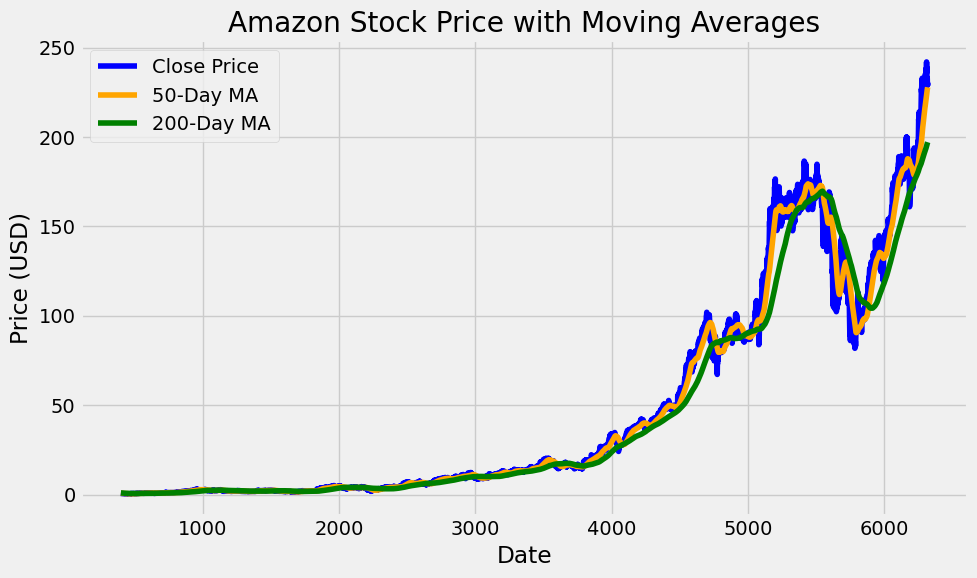

In [22]:
# Plot - Closing Price + Moving Averages

plt.figure(figsize=(10, 6))
plt.plot(df['close'], label='Close Price', color='blue')
plt.plot(df['MA50'], label='50-Day MA', color='orange')
plt.plot(df['MA200'], label='200-Day MA', color='green')
plt.title('Amazon Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

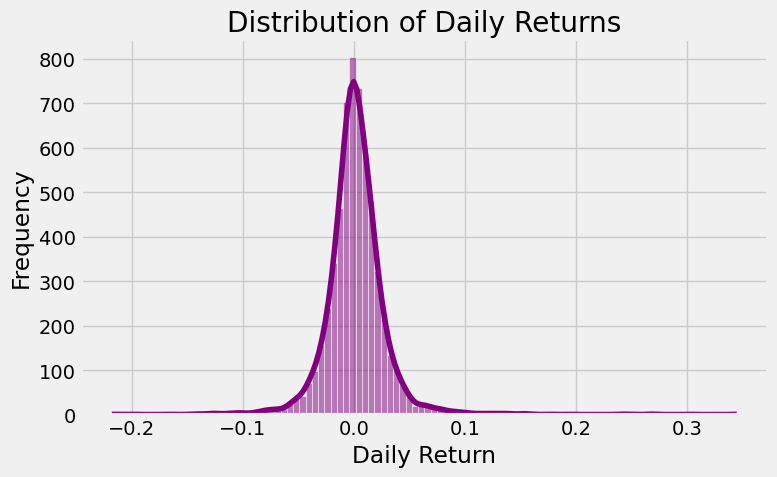

In [23]:
# Plot - Daily Returns Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['daily_return'], bins=100, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# ML Prediction - Next Day Closing Price

df['target'] = df['close'].shift(-1)
df.dropna(inplace=True)

In [13]:
features = ['open', 'high', 'low', 'volume']
X = df[features]
y = df['target']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [18]:
# 📈 Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

C:\Users\evans\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 3.245231294919382
R² Score: 0.9901677021973712


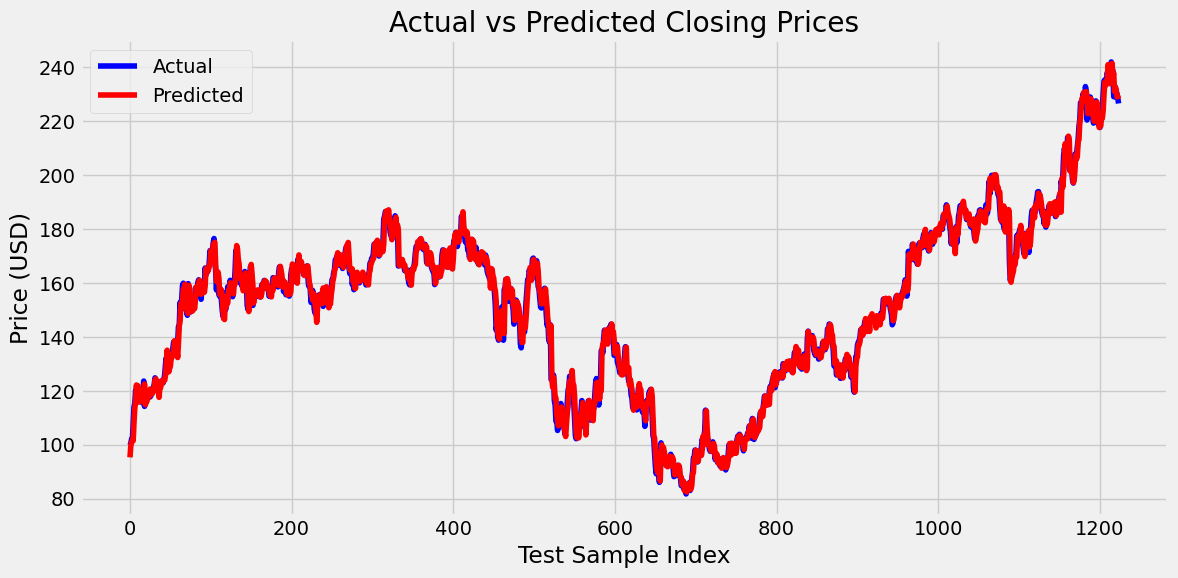

In [20]:
# 📉 Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Test Sample Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()